# Testing for Trends - Lab

## Introduction

In this lab, you'll practice your knowledge on testing for stationarity.

## Objectives

You will be able to:

* Check and comment on the stationarity of time series data 
* Use rolling statistics as an initial check for stationarity 
* Use the Dickey Fuller Test for performing statistical testing for time series stationarity

## Importing the data

Let's look at some new data. In this lab, We'll work by creating a time-series object in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

This dataset is stored as `passengers.csv`.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
% matplotlib inline

pass_data = pd.read_csv('passengers.csv')

Import `passengers.csv` and view the head.

In [2]:
# Read the dataset 'passengers.csv' and view the head
pass_data.head()
# Month	#Passengers
# 0	1949-01-01	112
# 1	1949-02-01	118
# 2	1949-03-01	132
# 3	1949-04-01	129
# 4	1949-05-01	121

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Change the `Month` column over to a `datetime` object and make sure it is set as the index.

In [4]:
# Set month column as a timeseries object, and make it the index
pass_data.Month = pd.to_datetime(pass_data.Month)
pass_data.info()

pass_data.set_index('Month', inplace= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [7]:
# check the head and the new index
pass_data.head()
pass_data.index
# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Now that we have successfully created a TS object, we can use simple `plot()` function in pandas to visually incpect this time-series.

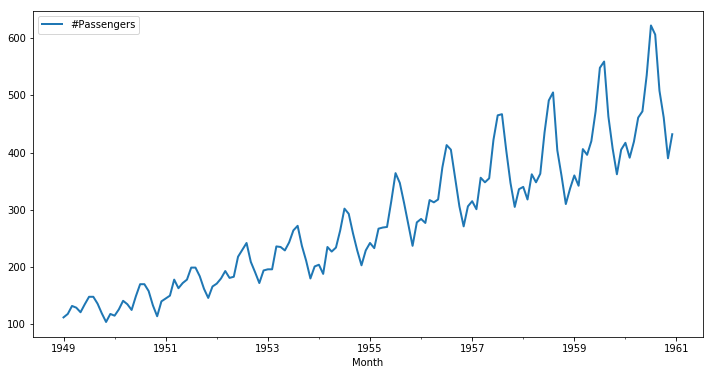

In [9]:
# Plot the time series data 
pass_data.plot(figsize=(12, 6), linewidth=2, fontsize=10);

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and 

## Rolling Statistics 

Use the `.rolling()` function to find rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

In [10]:
#Determine rolling statistics
rollmean = pass_data.rolling(window=12, center=False).mean()
rollstd = pass_data.rolling(window=12, center=False).std()

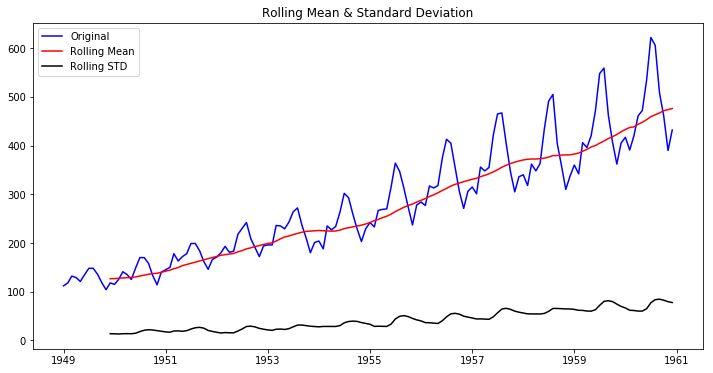

In [12]:
#Plot rolling statistics
fig = plt.figure(figsize=(12,6))
orig = plt.plot(pass_data, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Though the variation in standard deviation is small, mean is clearly increasing with time and thus, this is not a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller Test to verify your visual result.

In [14]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test: ')
dftest = adfuller(pass_data['#Passengers'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

# Results of Dickey-Fuller Test:
# Test Statistic                   0.815369
# p-value                          0.991880
# #Lags Used                      13.000000
# Number of Observations Used    130.000000
# Critical Value (1%)             -3.481682
# Critical Value (5%)             -2.884042
# Critical Value (10%)            -2.578770
# dtype: float64

Results of Dickey-Fuller Test: 
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Conclusion here

## Level up - Optional

Repeat the previous steps for the NYSE monthly data , stored in "NYSE_monthly.csv".

In [41]:
nyse_data = pd.read_csv('NYSE_monthly.csv')
nyse_data.head()
nyse_data.info

<bound method DataFrame.info of       Month  monthly_return
0   1961-01           0.082
1   1961-02           0.059
2   1961-03           0.050
3   1961-04           0.008
4   1961-05           0.042
5   1961-06          -0.042
6   1961-07           0.011
7   1961-08           0.021
8   1961-09          -0.030
9   1961-10           0.021
10  1961-11           0.046
11  1961-12          -0.004
12  1962-01          -0.008
13  1962-02           0.016
14  1962-03          -0.006
15  1962-04          -0.048
16  1962-05          -0.021
17  1962-06           0.045
18  1962-07           0.064
19  1962-08           0.028
20  1962-09          -0.061
21  1962-10          -0.022
22  1962-11           0.071
23  1962-12          -0.009
24  1963-01           0.068
25  1963-02          -0.015
26  1963-03           0.021
27  1963-04           0.039
28  1963-05           0.032
29  1963-06          -0.016
..      ...             ...
42  1964-07           0.028
43  1964-08          -0.009
44  1964-09     

In [46]:
nyse_data.Month = pd.to_datetime(nyse_data.Month)
nyse_data.info()
nyse_data.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
Month             72 non-null datetime64[ns]
monthly_return    72 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


RangeIndex(start=0, stop=72, step=1)

In [49]:
nyse_data.plot(figsize=(20, 12), linewidth=2, fontsize=10);

ValueError: view limit minimum -35901.864050000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x107b2ea60> (for post_execute):


ValueError: view limit minimum -35901.864050000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -35901.864050000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x864 with 1 Axes>

In [44]:
nyse_data.index

RangeIndex(start=0, stop=72, step=1)

In [50]:
rolmean = nyse_data.rolling(window=72, center=False).mean()
rolstd = nyse_data.rolling(window=72, center=False).std()

NotImplementedError: ops for Rolling for this dtype datetime64[ns] are not implemented

TypeError: unhashable type: 'numpy.ndarray'

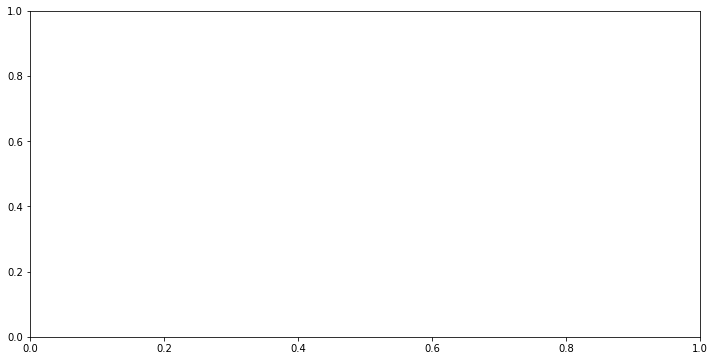

In [40]:
fig = plt.figure(figsize=(12,6))
orig = plt.plot(nyse_data, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [51]:
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test: ')
dftest = adfuller(nyse_data['monthly_return'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Results of Dickey-Fuller Test: 
Test Statistic                -7.895375e+00
p-value                        4.325126e-12
#Lags Used                     0.000000e+00
Number of Observations Used    7.100000e+01
Critical Value (1%)           -3.526005e+00
Critical Value (5%)           -2.903200e+00
Critical Value (10%)          -2.588995e+00
dtype: float64


## Summary

In this lab, we learnt to check for the stationarity of a time-series object in Python. Next, we'll further explore stationarity and how to make sure to make time series stationary!